**PROPERTY DATASET**

Kasus:

- Anda adalah seorang Data Analyst yang bekerja di PT Ray Pink Property Indonesia (RPPI).
- RPPI adalah perusahaan property yang berdiri sejak 11 tahun yang lalu.
RPPI memliki kantor cabang di 7 propinsi di Indonesia dan jumlahnya terus bertambah.
- Valuasi RPPI tahun ini mencapai Rp 7 Trilyun, meningkat 7% dari tahun sebelumnya.
- Bidang usaha RPPI adalah investasi dan jual-beli property secara umum, termasuk bekerja sama dengan developer perumahan.
- Data Engineer (DE)/Database Administrator (DBA) RPPI berhasil mengumpulkan data rumah-rumah yang dijual di beberapa kota di Indonesia.
- Sebagai Data Analyst anda akan hadir dan melakukan presentasi pada rapat direksi untuk memberikan insight dari data ke upper management (C-Level, senior managers, dan komisaris perusahaan).
- Di studi kasus ini anda mempersiapkan "bahan presentasi" dengan cara melakukan EDA pada data yang diterima dari DE/DBA.

Petunjuk:
Di studi kasus pertama, anda mendapat bantuan keterangan dari manajemen. Setelah berdiskusi over lunch dengan beberapa manager senior, anda mendengar bahwa mereka ingin mengetahui:

1. Kualitas data yang dimiliki perusahaan.
2. Apakah ada saran perbaikan data ke DE/DBA perusahaan agar RPPI menjadi data driven company yang unggul.
3. Dari data yang ada, apakah ada kecenderungan rumah disuatu kota lebih mahal/murah dibandingkan kota lain?
4. Dari data yang ada, apakah bisa dibuat rekomendasi sebaiknya RPPI membuat kantor cabang berikutnya di kota mana? Mengapa? (Asumsikan RPPI belum memiliki cabang di kota-kota yang disebutkan di data).
5. Rumah dengan karakteristik seperti apa yang paling banyak dijual?
6. Jika RPPI ingin melakukan investasi (max) Rp. 25 Milyar minggu besok, apakah dari data anda dapat memberikan rekomendasi rumah mana saja yang akan berpotensi menghasilkan keuntungan bagi perusahaan?
7. Dan yang terpenting, informasi berharga apa lagi yang bisa anda dapatkan dari data?

#**Import Modul**

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# **Memanggil Data**

In [4]:
!git clone https://github.com/Dwiatikaa/Projects.git
%cd Projects

db_bekasi = pd.read_csv('data/bekasi.csv', encoding='utf-8-sig')
db_bogor = pd.read_csv('data/bogor.csv', encoding='utf-8-sig')
db_depok = pd.read_csv('data/depok.csv', encoding='utf-8-sig')
db_jakarta = pd.read_csv('data/jakarta.csv', encoding='utf-8-sig')
db_tangerang = pd.read_csv('data/tangerang.csv', encoding='utf-8-sig')

Cloning into 'Projects'...
remote: Enumerating objects: 38, done.
remote: Counting objects: 100% (38/38), done.
remote: Compressing objects: 100% (34/34), done.
remote: Total 38 (delta 16), reused 17 (delta 3), pack-reused 0 (from 0)
Receiving objects: 100% (38/38), 4.06 MiB | 9.81 MiB/s, done.
Resolving deltas: 100% (16/16), done.
/content/Projects


### Menggabungkan data dari 5 kota menjadi 1 dataframe

In [5]:
db_bekasi["Kota"] = "Bekasi"
db_bogor["Kota"] = "Bogor"
db_depok["Kota"] = "Depok"
db_jakarta["Kota"] = "Jakarta"
db_tangerang["Kota"] = "Tangerang"

db = pd.concat([db_bekasi, db_bogor, db_depok, db_jakarta, db_tangerang], ignore_index=True)
db

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,...,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Kota
0,08-12-2021,71.0,43.0,2.0,1.0,NaN,1.0,Kabupaten Bekasi,SHM,1300.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bekasi
1,08-12-2021,59.0,60.0,2.0,1.0,NaN,1.0,Kabupaten Bekasi,SHM,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bekasi
2,08-12-2021,124.0,95.0,2.0,1.0,NaN,1.0,Kabupaten Bekasi,SHM,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bekasi
3,08-12-2021,144.0,100.0,2.0,1.0,NaN,1.0,Kabupaten Bekasi,SHM,2200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bekasi
4,08-12-2021,108.0,100.0,3.0,2.0,NaN,1.0,Kabupaten Bekasi,SHM,2200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bekasi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4136,12-08-2021,91.0,91.0,3.0,2.0,NaN,NaN,"Poris, Tangerang",SHM,3500.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Tangerang
4137,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Tangerang
4138,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Tangerang
4139,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Tangerang


### Membuang kolom yang tidak diperlukan

In [6]:
db = db.drop(columns = ['Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25'], axis=1)

### Memahami data

In [7]:
db.shape
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4141 entries, 0 to 4140
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   created_at  664 non-null    object 
 1   LT          665 non-null    object 
 2   LB          663 non-null    float64
 3   KT          663 non-null    float64
 4   KM          662 non-null    float64
 5   garasi      333 non-null    float64
 6   carport     550 non-null    float64
 7   lokasi      663 non-null    object 
 8   sertifikat  658 non-null    object 
 9   listrik     628 non-null    float64
 10  hadap       214 non-null    object 
 11  harga       663 non-null    float64
 12  URL         663 non-null    object 
 13  deskripsi   654 non-null    object 
 14  Kota        4141 non-null   object 
dtypes: float64(7), object(8)
memory usage: 485.4+ KB


In [8]:
db.describe()

,LB,KT,KM,garasi,carport,listrik,harga
count,663.000000,663.000000,662.000000,333.000000,550.000000,628.000000,6.630000e+02
mean,151.380090,3.155354,2.303625,0.828829,1.494545,3057.961783,2.188769e+09
std,199.432867,1.387797,1.374047,1.290889,1.080953,4770.949803,7.596722e+09
min,15.000000,1.000000,1.000000,0.000000,0.000000,900.000000,4.100000e+01
25%,50.000000,2.000000,1.000000,0.000000,1.000000,1300.000000,1.950000e+03
50%,83.000000,3.000000,2.000000,0.000000,1.000000,2200.000000,4.560000e+08
75%,180.000000,4.000000,3.000000,1.000000,2.000000,2200.000000,1.350000e+09
max,2500.000000,10.000000,10.000000,10.000000,10.000000,66000.000000,1.050000e+11


In [9]:
# merubah type pada variabel LT, garasi, carport, sertifikat, hadap, kota
db['LT'] = pd.to_numeric(db['LT'], errors='coerce')
db['garasi'] = db['garasi'].astype('category')
db['carport'] = db['carport'].astype('category')
db['sertifikat'] = db['sertifikat'].astype('category')
db['hadap'] = db['hadap'].astype('category')
db['Kota'] = db['Kota'].astype('category')

In [10]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4141 entries, 0 to 4140
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   created_at  664 non-null    object  
 1   LT          663 non-null    float64 
 2   LB          663 non-null    float64 
 3   KT          663 non-null    float64 
 4   KM          662 non-null    float64 
 5   garasi      333 non-null    category
 6   carport     550 non-null    category
 7   lokasi      663 non-null    object  
 8   sertifikat  658 non-null    category
 9   listrik     628 non-null    float64 
 10  hadap       214 non-null    category
 11  harga       663 non-null    float64 
 12  URL         663 non-null    object  
 13  deskripsi   654 non-null    object  
 14  Kota        4141 non-null   category
dtypes: category(5), float64(6), object(4)
memory usage: 345.9+ KB


In [11]:
# Cek rentang harga per kota
db.groupby("Kota")["harga"].agg(["min", "max", "mean"]).sort_values("mean")

/tmp/ipython-input-1337280048.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  db.groupby("Kota")["harga"].agg(["min", "max", "mean"]).sort_values("mean")


,min,max,mean
Kota,,,
Depok,41.0,9.000000e+03,1.194441e+03
Tangerang,95.0,1.000000e+05,3.849556e+03
Bekasi,160000000.0,4.500000e+09,1.074823e+09
Bogor,65000000.0,1.650000e+10,1.289362e+09
Jakarta,380000000.0,1.050000e+11,8.985955e+09


In [12]:
# konversi harga ke rupiah penuh
db["harga"] = db["harga"].apply(lambda x: x*1e6 if x < 1e6 else x)

# cek  kembali ringkas per kota
print(db.groupby("Kota")["harga"].agg(["min", "max", "mean"]))

                   min           max          mean
Kota                                              
Bekasi     160000000.0  4.500000e+09  1.074823e+09
Bogor       65000000.0  1.650000e+10  1.289362e+09
Depok       41000000.0  9.000000e+09  1.194441e+09
Jakarta    380000000.0  1.050000e+11  8.985955e+09
Tangerang   95000000.0  1.000000e+11  3.849556e+09


/tmp/ipython-input-3521798384.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(db.groupby("Kota")["harga"].agg(["min", "max", "mean"]))


# **Cek Duplikat**

In [13]:
# Cek juga duplikat berdasarkan subset kolom yang penting seperti LT, LB, KT, KM, Lokasi, Harga, garasi, carport, sertifikat, listrik, harga_kategori, kota
# created_at tidak diikutsertakan karena hanya menampilkan tanggal dimana iklan tersebut dibuat

subset_cols = ['LT', 'LB', 'KT', 'KM', 'lokasi', 'harga', 'garasi', 'carport', 'sertifikat', 'listrik', 'Kota', 'hadap']

df_duplikat_subset = db[db.duplicated(subset=subset_cols, keep=False)]
print(f"Jumlah duplikat berdasarkan subset {subset_cols}: {len(df_duplikat_subset)}")

# menampilkan jumlah total baris duplikat dengan mempertahankan baris pertama bukan duplikat
df_duplikat_subset2 = db[db.duplicated(subset=subset_cols, keep='first')]
print(f"Jumlah duplikat berdasarkan subset2 {subset_cols}: {len(df_duplikat_subset2)}")

#Menampilkan
df_duplikat_subset.sort_values(by=subset_cols)

Jumlah duplikat berdasarkan subset ['LT', 'LB', 'KT', 'KM', 'lokasi', 'harga', 'garasi', 'carport', 'sertifikat', 'listrik', 'Kota', 'hadap']: 3508
Jumlah duplikat berdasarkan subset2 ['LT', 'LB', 'KT', 'KM', 'lokasi', 'harga', 'garasi', 'carport', 'sertifikat', 'listrik', 'Kota', 'hadap']: 3490


,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,hadap,harga,URL,deskripsi,Kota
2010,6-12-2021,50.0,36.0,2.0,1.0,NaN,NaN,Sawangan,SHM,NaN,NaN,260000000.0,https://www.rumah123.com/properti/depok/hos928...,Rumah Murah Dekat Stasiun dan Tol di Depok Saw...,Depok
2026,5-12-2021,50.0,36.0,2.0,1.0,NaN,NaN,Sawangan,SHM,NaN,NaN,260000000.0,https://www.rumah123.com/properti/depok/hos928...,Rumah Murah Dekat Stasiun dan Tol di Depok Saw...,Depok
2032,5-12-2021,50.0,36.0,2.0,1.0,NaN,NaN,Sawangan,SHM,NaN,NaN,260000000.0,https://www.rumah123.com/properti/depok/hos928...,Rumah Murah Dekat Stasiun dan Tol di Depok Saw...,Depok
2084,5-12-2021,50.0,36.0,2.0,1.0,NaN,NaN,Sawangan,SHM,NaN,NaN,260000000.0,https://www.rumah123.com/properti/depok/hos928...,Rumah Murah Dekat Stasiun dan Tol di Depok Saw...,Depok
2025,5-12-2021,54.0,47.0,2.0,2.0,NaN,NaN,Tapos,SHM,NaN,NaN,498000000.0,https://www.rumah123.com/properti/depok/hos928...,Cluster Mewah Harga 1 Lantai Dapat 2 Lantai Ha...,Depok
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Jakarta
4137,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Tangerang
4138,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Tangerang
4139,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Tangerang


### Penanganan data duplikat

In [14]:
# Drop duplikat berdasarkan subset kolom penting
db_2 = db.drop_duplicates(subset=subset_cols, keep='first')

print(f"Jumlah data awal: {len(db)}")
print(f"Jumlah data setelah drop duplikat: {len(db_2)}")

Jumlah data awal: 4141
Jumlah data setelah drop duplikat: 651


In [15]:
#Mengecek kembali keberadaan data duplikat
print(db.duplicated(subset=subset_cols).sum())

#Total baris data setelah dibersihkan
print(len(db_2))

3490
651


# **Cek Outlier**

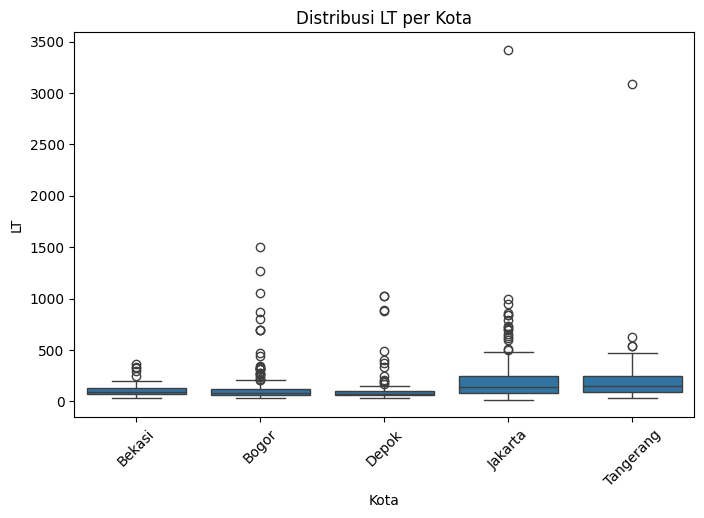

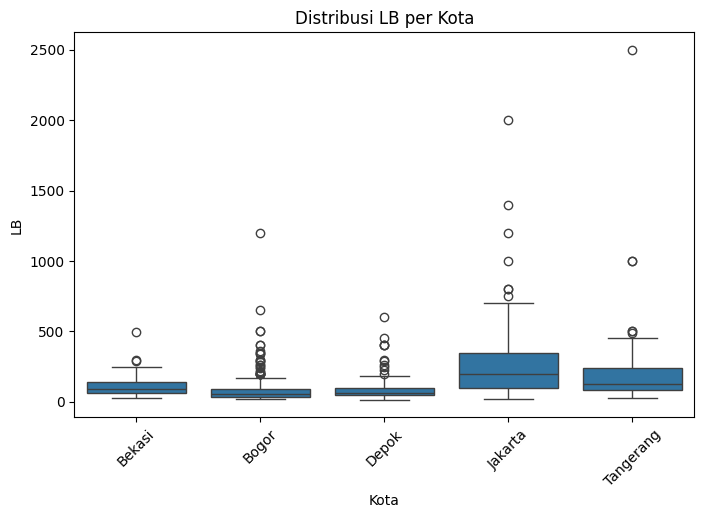

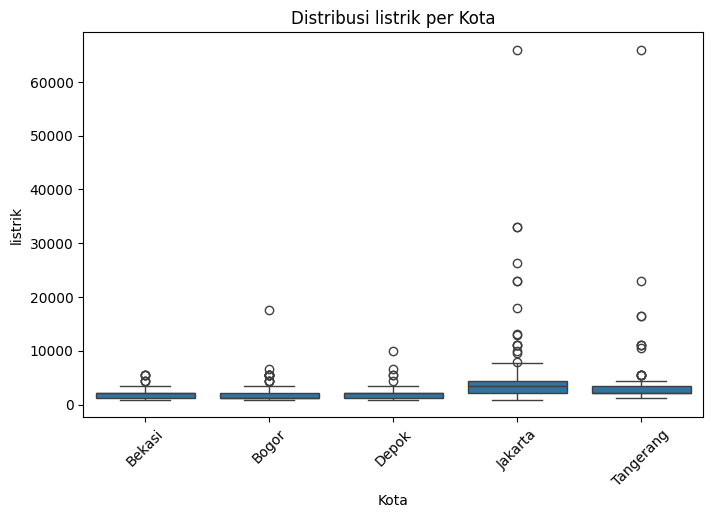

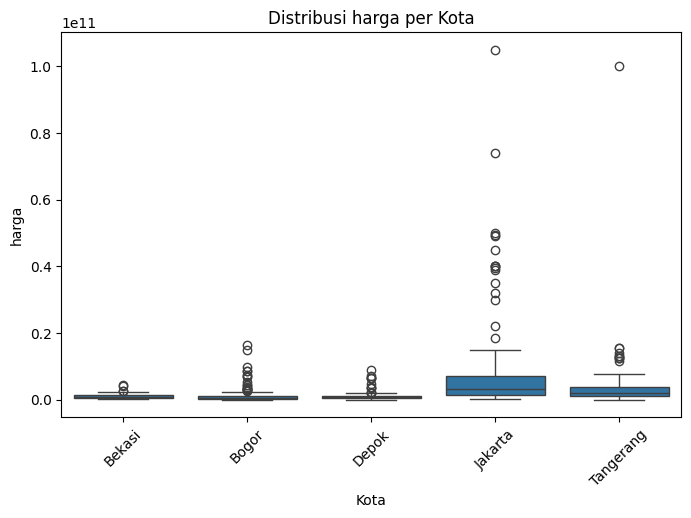

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

numeric_cols = ['LT','LB','listrik','harga']
col_kota = "Kota"

for col in numeric_cols:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=col_kota, y=col, data=db_2)
    plt.title(f"Distribusi {col} per {col_kota}")
    plt.xticks(rotation=45)
    plt.show()

### Penanganan outlier

In [17]:
# Fungsi deteksi outlier per kota
def detect_outliers_by_city(df, col_kota="Kota"):
    outliers_q1 = {}
    outliers_q3 = {}

    for col in df.select_dtypes(include='number').columns:
        outliers_q1[col] = pd.Series(dtype=df[col].dtype)
        outliers_q3[col] = pd.Series(dtype=df[col].dtype)

        for kota, grup in df.groupby(col_kota):
            Q1 = grup[col].quantile(0.25)
            Q3 = grup[col].quantile(0.75)
            IQR = Q3 - Q1

            batas_bawah = Q1 - 1.5 * IQR
            batas_atas  = Q3 + 1.5 * IQR

            mask_q1 = grup[col] < batas_bawah
            mask_q3 = grup[col] > batas_atas

            outliers_q1[col] = pd.concat([outliers_q1[col], grup.loc[mask_q1, col]])
            outliers_q3[col] = pd.concat([outliers_q3[col], grup.loc[mask_q3, col]])

    return outliers_q1, outliers_q3


# --- Proses utama dengan iterasi ---
df_outlier_q1 = pd.DataFrame()
df_outlier = pd.DataFrame()

# Initialize db_outliers_q1 before the loop
db_outliers_q1 = pd.DataFrame()


n_iter = 10  # jumlah iterasi
for i in range(n_iter):
    outliers_q1, outliers_q3_iter = detect_outliers_by_city(db_2, col_kota="Kota")

    # Kumpulkan outlier bawah
    outlier_rows_q1 = [db_2.loc[out.index] for out in outliers_q1.values() if not out.empty]
    df_iter_q1 = pd.concat(outlier_rows_q1).drop_duplicates() if outlier_rows_q1 else pd.DataFrame()

    # Kumpulkan outlier atas
    outlier_rows_q3 = [db_2.loc[out.index] for out in outliers_q3_iter.values() if not out.empty]
    df_iter_q3 = pd.concat(outlier_rows_q3).drop_duplicates() if outlier_rows_q3 else pd.DataFrame()

    # Gabungkan hasil iterasi ke total
    db_outliers_q1 = pd.concat([db_outliers_q1, df_iter_q1]).drop_duplicates()
    df_outlier = pd.concat([df_outlier, df_iter_q3]).drop_duplicates()

# Semua outlier (Q1 + Q3)
db_outliers = pd.concat([db_outliers_q1, df_outlier]).drop_duplicates()

# Data bersih = semua data dikurangi outlier
db_3 = db_2.drop(db_outliers.index)

print("Jumlah data asli :", db_2.shape[0])
print("Jumlah data bersih:", db_3.shape[0])
print("Jumlah outlier total:", db_outliers.shape[0])
print("  Outlier bawah (Q1):", db_outliers_q1.shape[0])
print("  Outlier atas (Q3) :", db_outliers.shape[0])
print("Cek konsistensi total:", db_3.shape[0] + db_outliers.shape[0])

/tmp/ipython-input-2751389671.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for kota, grup in df.groupby(col_kota):
/tmp/ipython-input-2751389671.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for kota, grup in df.groupby(col_kota):
/tmp/ipython-input-2751389671.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for kota, grup in df.groupby(col_kota):
/tmp/ipython-input-2751389671.py:10: FutureWarning: The

Jumlah data asli : 651
Jumlah data bersih: 531
Jumlah outlier total: 120
  Outlier bawah (Q1): 0
  Outlier atas (Q3) : 120
Cek konsistensi total: 651


/tmp/ipython-input-2751389671.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for kota, grup in df.groupby(col_kota):
/tmp/ipython-input-2751389671.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for kota, grup in df.groupby(col_kota):
/tmp/ipython-input-2751389671.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for kota, grup in df.groupby(col_kota):
/tmp/ipython-input-2751389671.py:10: FutureWarning: The

Jumlah data asli : 651

Jumlah data bersih: 531

Jumlah outlier total: 120

  Outlier bawah (Q1): 0

  Outlier atas (Q3) : 120
  
Cek konsistensi total: 651

# **Feature Engineering**

In [18]:
# cek categori pada variable sertifikat
db_3['sertifikat'].value_counts()
db_outliers['sertifikat'].value_counts()

,count
sertifikat,
SHM,100
HGB,8
SHGB,3
SHM + IMB,2
Lainnya,2
"lainnya(PPJB, GIRIK, ADAT, dll)",1
SHM + IMB + PBB,1
AJB,0
PPJB,0


In [19]:
mapping = {
    "SHM": "SHM",
    "SHM + IMB": "SHM",
    "SHM,IMB": "SHM",
    "SHM + IMB + PBB": "SHM",
    "SHM + Hak Pakai": "Lainnya",

    "SHGB": "SHGB",
    "HGB": "HGB",

    "PPJB": "Lainnya",
    "AJB": "AJB",

    "lainnya(PPJB, GIRIK, ADAT, dll)": "Lainnya",
    "Lainnya": "Lainnya"
}

db_3["sertifikat"] = db_3["sertifikat"].replace(mapping)
db_outliers["sertifikat"] = db_outliers["sertifikat"].replace(mapping)

/tmp/ipython-input-1634255990.py:18: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  db_3["sertifikat"] = db_3["sertifikat"].replace(mapping)
/tmp/ipython-input-1634255990.py:19: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  db_outliers["sertifikat"] = db_outliers["sertifikat"].replace(mapping)


In [20]:
# cek categori pada variable lokasi
db_3['lokasi'].value_counts()
db_outliers['lokasi'].value_counts()

,count
lokasi,
Jakarta Selatan,12
Kota Bekasi,9
Babakan Madang,9
"BSD, TANGERANG",9
Gunung Putri,9
Cinere,7
Jakarta Pusat,7
"BSD CITY, TANGERANG",6
Jakarta Utara,5


In [21]:
mapping_lokasi = {
    "BSD, TANGERANG": "BSD",
    "BSD CITY, TANGERANG": "BSD",
    "BSD GRIYA LOKA, TANGERANG": "BSD",
    "BSD THE GREEN, TANGERANG": "BSD",
    "BSD BUKIT GOLF, TANGERANG": "BSD",
    "BSD DE PARK, TANGERANG": "BSD",
    "BSD FORESTA, TANGERANG": "BSD",
    "GADING SERPONG, TANGERANG": "Gading Serpong",
    "LIPPO KARAWACI, TANGERANG": "Lippo Karawaci",
    "PONDOK CABE, TANGERANG": "Pondok Cabe",
    "CISAUK, TANGERANG": "Cisauk"
}

db_3["lokasi"] = db_3["lokasi"].replace(mapping_lokasi)
db_outliers["lokasi"] = db_outliers["lokasi"].replace(mapping_lokasi)

db_3['lokasi'].value_counts()
db_outliers['lokasi'].value_counts()

,count
lokasi,
BSD,21
Jakarta Selatan,12
Gunung Putri,9
Babakan Madang,9
Kota Bekasi,9
Jakarta Pusat,7
Cinere,7
Jakarta Utara,5
Jakarta Barat,4


# **Visualisasi Data**

## Data Bersih

### Jumlah Properti yang Dijual per Kota

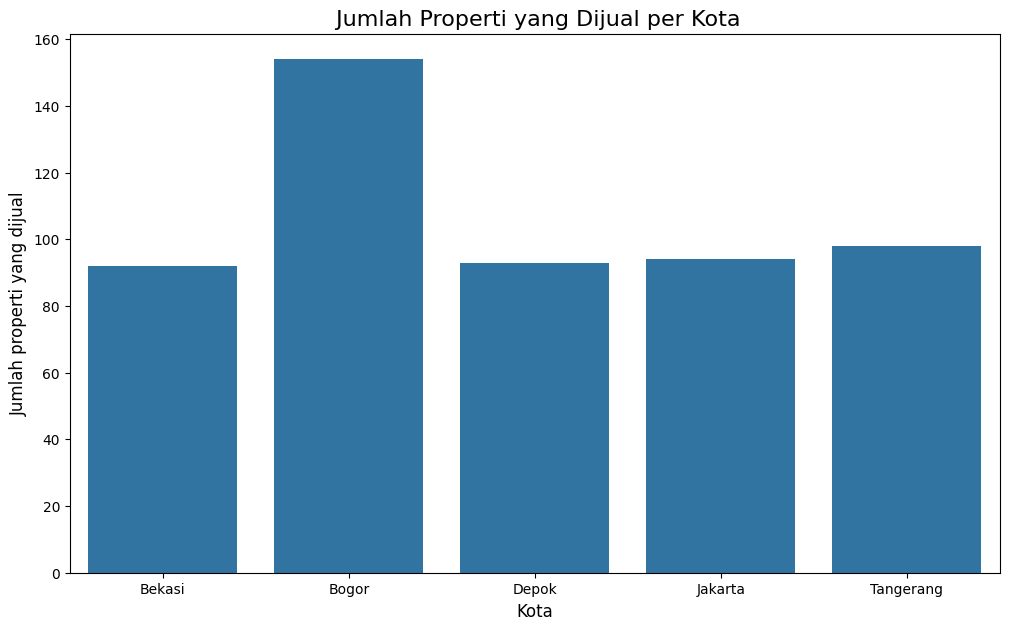

In [22]:
kota_counts = db_3['Kota'].value_counts()

plt.figure(figsize=(12, 7))
sns.barplot(x=kota_counts.index, y=kota_counts.values)
plt.title(' Jumlah Properti yang Dijual per Kota', fontsize=16)
plt.ylabel('Jumlah properti yang dijual', fontsize=12)
plt.xlabel('Kota', fontsize=12)
plt.savefig('barchart_volume_pasar.png')
plt.show()

### Distribusi Karakteristik Properti

In [23]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
# Asumsikan Anda sudah memiliki DataFrame bernama df_bersih

# --- 1. Konfigurasi Plot ---
# Definisikan semua plot yang ingin dibuat
# Format: {'col': 'nama_kolom', 'pos': (baris, kolom)}

bar_plots = [
    {'col': 'KT', 'pos': (1, 1)},
    {'col': 'KM', 'pos': (1, 2)},
]

hist_plots = [
    {'col': 'garasi',  'pos': (1, 3)},
    {'col': 'carport', 'pos': (2, 1)},
    {'col': 'LT',      'pos': (2, 2)},
    {'col': 'LB',      'pos': (2, 3)},
    {'col': 'harga',   'pos': (3, 1)},
]

# Judul untuk setiap subplot (sesuai urutan posisi)
subplot_titles = (
    'Jumlah Kamar Tidur', 'Jumlah Kamar Mandi', 'Distribusi Garasi',
    'Distribusi Carport', 'Distribusi Luas Tanah (m²)', 'Distribusi Luas Bangunan (m²)',
    'Distribusi Harga'
)

# --- 2. Inisialisasi Subplot ---
fig = make_subplots(rows=3, cols=3, subplot_titles=subplot_titles)


# --- 3. Looping untuk Menambahkan Plot ---

# Loop untuk plot yang butuh perhitungan (countplot -> bar)
for plot_info in bar_plots:
    counts = db_3[plot_info['col']].value_counts()
    fig.add_trace(
        go.Bar(x=counts.index, y=counts.values, name=plot_info['col']),
        row=plot_info['pos'][0], col=plot_info['pos'][1]
    )

# Loop untuk plot histogram
for plot_info in hist_plots:
    fig.add_trace(
        go.Histogram(x=db_3[plot_info['col']], name=plot_info['col']),
        row=plot_info['pos'][0], col=plot_info['pos'][1]
    )


# --- 4. Mengatur Layout Final ---
fig.update_layout(
    title_text="Distribusi Karakteristik Properti",
    height=800,
    width=1200, # Lebar ditambah agar judul tidak tumpang tindih
    showlegend=False
)

# Menampilkan grafik interaktif
fig.show()

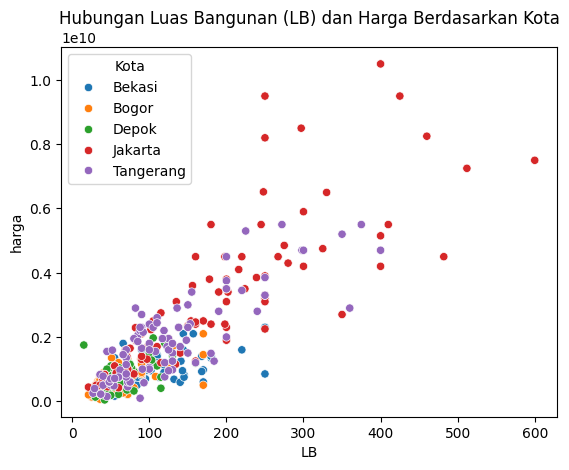

In [24]:
p = sns.scatterplot(x="LB", y="harga", hue="Kota", data=db_3)
p.set_title("Hubungan Luas Bangunan (LB) dan Harga Berdasarkan Kota")
plt.show()

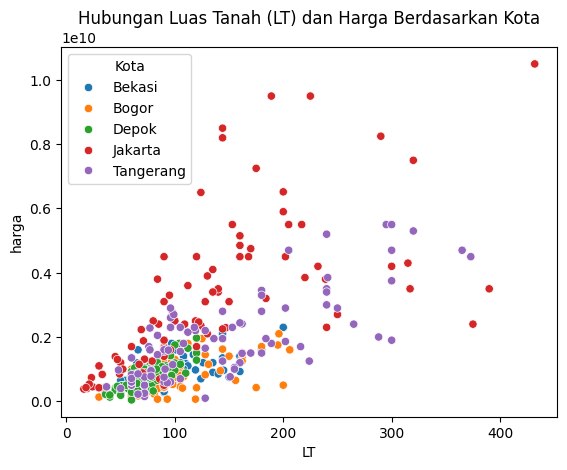

In [25]:
p = sns.scatterplot(x="LT", y="harga", hue="Kota", data=db_3)
p.set_title("Hubungan Luas Tanah (LT) dan Harga Berdasarkan Kota")
plt.show()

### Distribusi Harga Properti di Setiap Kota

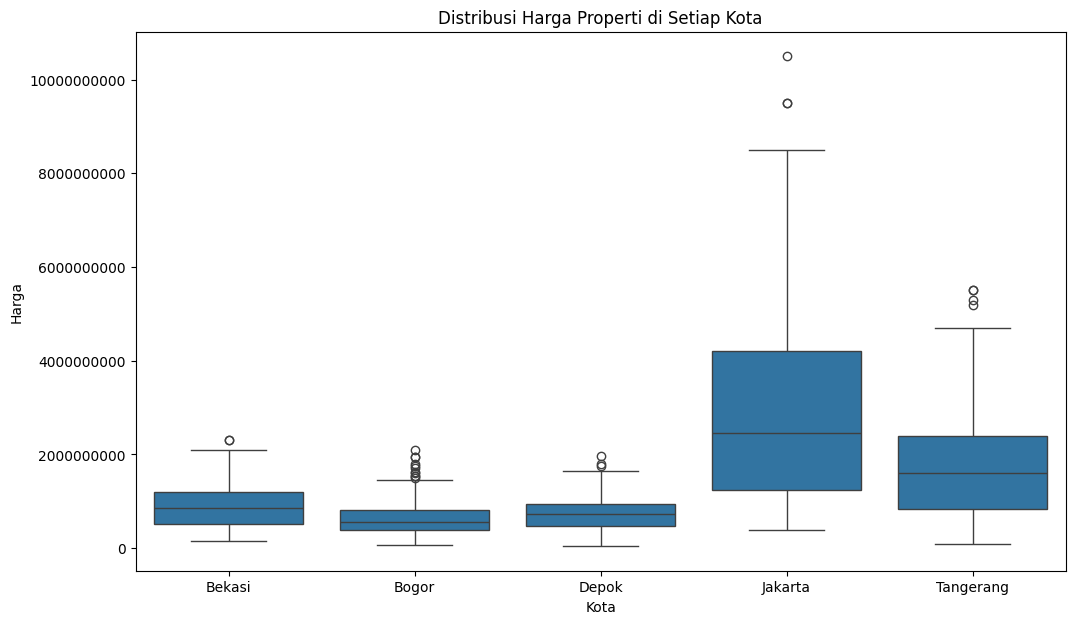

In [26]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Kota', y='harga', data=db_3)
plt.title('Distribusi Harga Properti di Setiap Kota')
plt.ylabel('Harga')
plt.xlabel('Kota')
plt.ticklabel_format(style='plain', axis='y')
plt.show()

### Komposisi Jumlah sertifikat properti di setiap kota

In [27]:
import plotly.express as px
# Asumsikan Anda sudah memiliki DataFrame bernama df_bersih

# Membuat stacked bar chart interaktif.
# Plotly akan secara otomatis menghitung jumlah properti (count) untuk setiap segmen.
fig = px.histogram(db_3,
                   x='Kota',
                   color='sertifikat',  # Variabel yang akan menjadi "tumpukan" (stack)
                   title='Komposisi Jumlah sertifikat properti di setiap kota',
                   labels={'sertifikat': 'Jumlah sertifikat'}, # Mengganti nama legenda
                   # Mengurutkan legenda agar rapi (misal: 1, 2, 3, 4, ...)
                   category_orders={'sertifikat': sorted(db_3['sertifikat'].astype(str).unique())}
                  )

# Mengganti nama sumbu Y menjadi lebih deskriptif
fig.update_yaxes(title_text='Jumlah Properti')

fig.show()

## Data Outlier

### Jumlah Properti yang Dijual per Kota

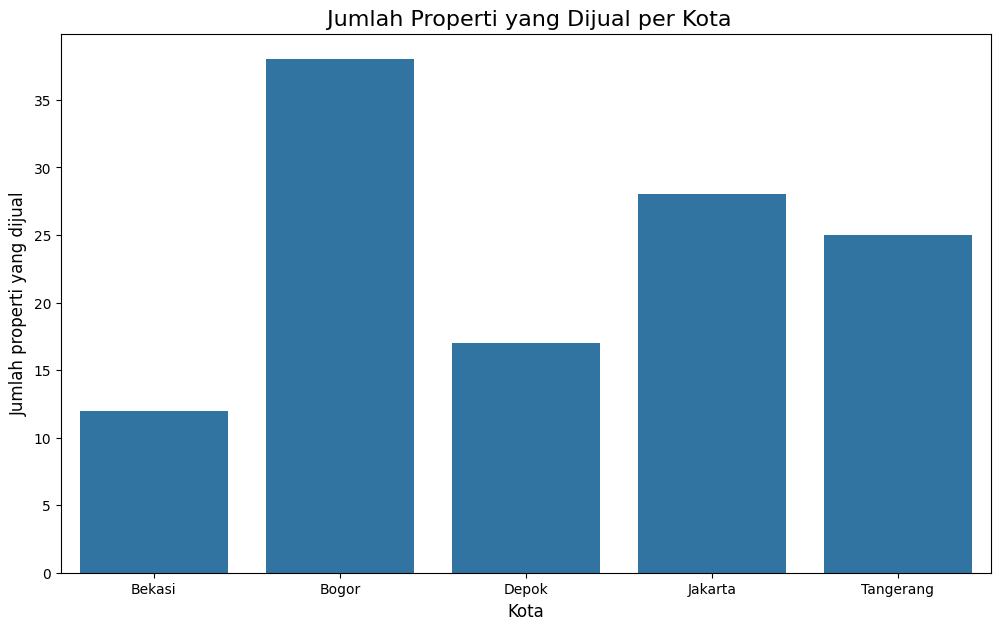

In [28]:
kota_counts = db_outliers['Kota'].value_counts()

plt.figure(figsize=(12, 7))
sns.barplot(x=kota_counts.index, y=kota_counts.values)
plt.title(' Jumlah Properti yang Dijual per Kota', fontsize=16)
plt.ylabel('Jumlah properti yang dijual', fontsize=12)
plt.xlabel('Kota', fontsize=12)
plt.savefig('barchart_volume_pasar.png')
plt.show()

### Distribusi Karakteristik Properti

In [29]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
# Asumsikan Anda sudah memiliki DataFrame bernama df_outlier

# --- 1. Konfigurasi Plot ---
# Definisikan semua plot yang ingin dibuat dari df_outlier
bar_plots = [
    {'col': 'KT', 'pos': (1, 1)},
    {'col': 'KM', 'pos': (1, 2)},
]

hist_plots = [
    {'col': 'garasi',  'pos': (1, 3)},
    {'col': 'carport', 'pos': (2, 1)},
    {'col': 'LT',      'pos': (2, 2)},
    {'col': 'LB',      'pos': (2, 3)},
    {'col': 'harga',   'pos': (3, 1)},
]

# Judul untuk setiap subplot
subplot_titles = (
    'Jumlah Kamar Tidur', 'Jumlah Kamar Mandi', 'Distribusi Garasi',
    'Distribusi Carport', 'Distribusi Luas Tanah (m²)', 'Distribusi Luas Bangunan (m²)',
    'Distribusi Harga'
)

# --- 2. Inisialisasi Subplot ---
fig = make_subplots(rows=3, cols=3, subplot_titles=subplot_titles)


# --- 3. Looping untuk Menambahkan Plot ---

# Loop untuk plot yang butuh perhitungan (countplot -> bar)
for plot_info in bar_plots:
    counts = df_outlier[plot_info['col']].value_counts()
    fig.add_trace(
        go.Bar(x=counts.index, y=counts.values, name=plot_info['col']),
        row=plot_info['pos'][0], col=plot_info['pos'][1]
    )

# Loop untuk plot histogram
for plot_info in hist_plots:
    fig.add_trace(
        go.Histogram(x=db_outliers[plot_info['col']], name=plot_info['col']),
        row=plot_info['pos'][0], col=plot_info['pos'][1]
    )


# --- 4. Mengatur Layout Final ---
fig.update_layout(
    title_text="Distribusi Karakteristik Properti (dari df_outlier)",
    height=800,
    width=1200,
    showlegend=False
)

# Menampilkan grafik interaktif
fig.show()

In [30]:

from plotly.subplots import make_subplots
import plotly.graph_objects as go
# Asumsikan Anda sudah memiliki DataFrame bernama df_outlier

# --- 1. Konfigurasi Plot (tetap sama) ---
bar_plots = [
    {'col': 'KT', 'pos': (1, 1)},
    {'col': 'KM', 'pos': (1, 2)},
]

hist_plots = [
    {'col': 'garasi',  'pos': (1, 3)},
    {'col': 'carport', 'pos': (2, 1)},
    {'col': 'LT',      'pos': (2, 2)},
    {'col': 'LB',      'pos': (2, 3)},
    {'col': 'harga',   'pos': (3, 1)},
]

subplot_titles = (
    'Jumlah Kamar Tidur per Kota', 'Jumlah Kamar Mandi per Kota', 'Distribusi Garasi per Kota',
    'Distribusi Carport per Kota', 'Distribusi Luas Tanah per Kota', 'Distribusi Luas Bangunan per Kota',
    'Distribusi Harga per Kota'
)

# --- 2. Inisialisasi Subplot (tetap sama) ---
fig = make_subplots(rows=3, cols=3, subplot_titles=subplot_titles)

# --- 3. Looping untuk Menambahkan Plot per KOTA ---

# Dapatkan daftar kota unik untuk di-loop
cities = df_outlier['Kota'].unique()

# Loop untuk plot Bar Chart
for plot_info in bar_plots:
    for city in cities:
        city_df = db_outliers[df_outlier['Kota'] == city]
        counts = city_df[plot_info['col']].value_counts()
        fig.add_trace(
            go.Bar(x=counts.index, y=counts.values, name=city),
            row=plot_info['pos'][0], col=plot_info['pos'][1]
        )

# Loop untuk plot Histogram
for plot_info in hist_plots:
    for city in cities:
        city_df = db_outliers[df_outlier['Kota'] == city]
        fig.add_trace(
            go.Histogram(x=city_df[plot_info['col']], name=city),
            row=plot_info['pos'][0], col=plot_info['pos'][1]
        )

# --- 4. Mengatur Layout Final ---
fig.update_layout(
    title_text="Distribusi Karakteristik Properti Berdasarkan Kota",
    height=800,
    width=1200,
    showlegend=True,  # Menampilkan legenda kota
    barmode='stack'   # Mengatur agar bar dan histogram menjadi tumpuk (stacked)
)

# Hanya menampilkan legenda sekali dan merapikannya
fig.update_traces(showlegend=True, selector=dict(type='bar', row=1, col=1))
fig.update_traces(showlegend=True, selector=dict(type='histogram', row=1, col=3))


# Menampilkan grafik interaktif
fig.show()

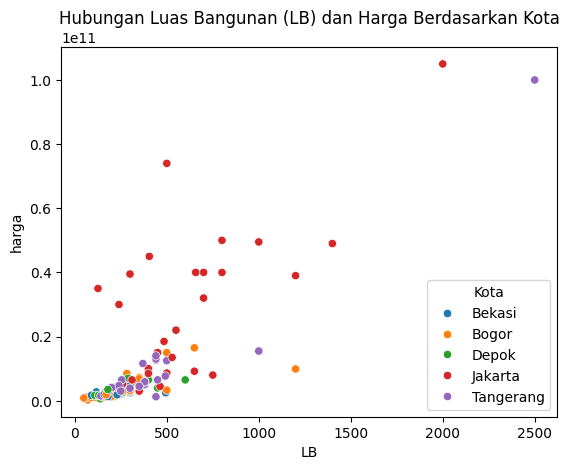

In [31]:
p = sns.scatterplot(x="LB", y="harga", hue="Kota", data=db_outliers)
p.set_title("Hubungan Luas Bangunan (LB) dan Harga Berdasarkan Kota")
plt.show()

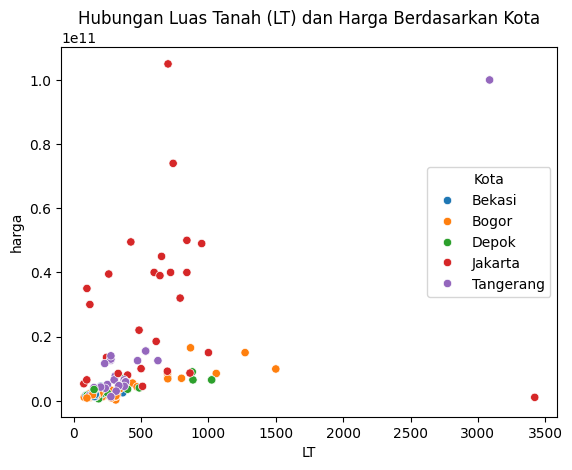

In [32]:
p = sns.scatterplot(x="LT", y="harga", hue="Kota", data=db_outliers)
p.set_title("Hubungan Luas Tanah (LT) dan Harga Berdasarkan Kota")
plt.show()

### Distribusi Harga Properti di Setiap Kota

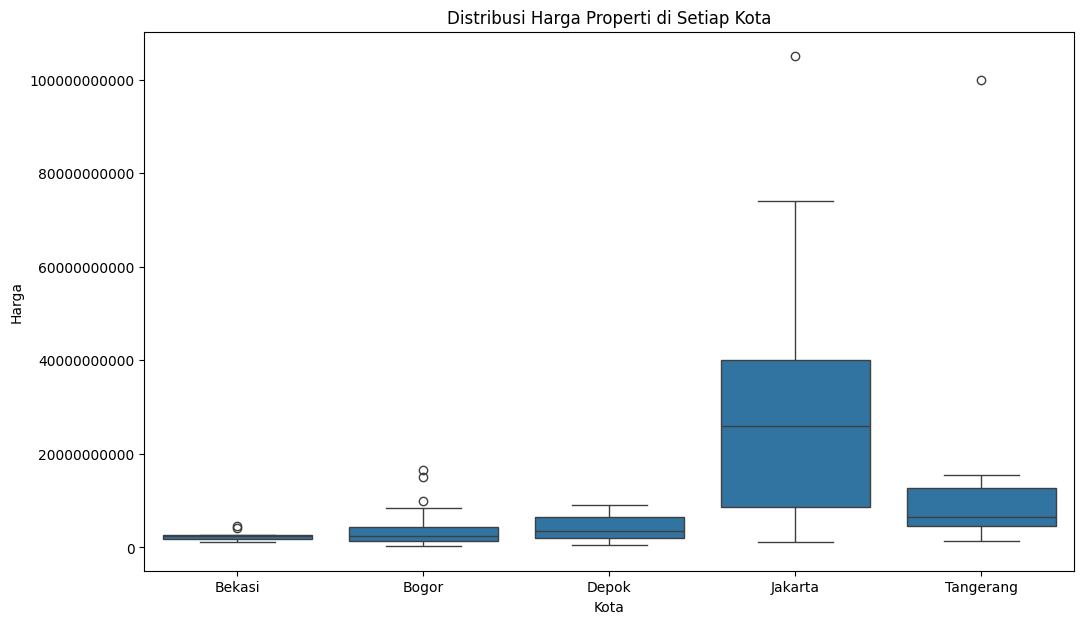

In [33]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Kota', y='harga', data=db_outliers)
plt.title('Distribusi Harga Properti di Setiap Kota')
plt.ylabel('Harga')
plt.xlabel('Kota')
plt.ticklabel_format(style='plain', axis='y')
plt.show()

### Komposisi Jumlah sertifikat properti di setiap kota

In [34]:
import plotly.express as px
# Asumsikan Anda sudah memiliki DataFrame bernama df_bersih

# Membuat stacked bar chart interaktif.
# Plotly akan secara otomatis menghitung jumlah properti (count) untuk setiap segmen.
fig = px.histogram(db_outliers,
                   x='Kota',
                   color='sertifikat',  # Variabel yang akan menjadi "tumpukan" (stack)
                   title='Komposisi Jumlah sertifikat properti di setiap kota',
                   labels={'sertifikat': 'Jumlah sertifikat'}, # Mengganti nama legenda
                   # Mengurutkan legenda agar rapi (misal: 1, 2, 3, 4, ...)
                   category_orders={'sertifikat': sorted(db_outliers['sertifikat'].astype(str).unique())}
                  )

# Mengganti nama sumbu Y menjadi lebih deskriptif
fig.update_yaxes(title_text='Jumlah Properti')

fig.show()

# **Hasil Analisis**

####1. Kualitas data yang dimiliki perusahaan.

#####Jawaban:

Data properti yang dimiliki saat ini masih memiliki beberapa kekurangan, antara lain:

- Banyak data kosong pada variabel penting, artinya ada informasi yang belum diinput dengan lengkap.
Ada data duplikat, misalnya satu rumah dipasang iklannya lebih dari sekali.
- Ada nilai yang tidak wajar (outlier) pada harga maupun luas bangunan/tanah, yang belum jelas apakah itu kesalahan input atau memang kondisi pasar khusus.

Secara keseluruhan, data ini belum sepenuhnya bersih dan masih perlu diperbaiki agar bisa menjadi dasar keputusan yang lebih kuat.

#### 2. Apakah ada saran perbaikan data ke DE/DBA perusahaan agar RPPI menjadi data driven company yang unggul.

######Jawaban:
Untuk mendukung RPPI menjadi data driven company yang unggul, ada beberapa saran perbaikan data yang dapat diberikan kepada tim Data Engineer (DE) maupun Database Administrator (DBA).

- Pertama, pastikan seluruh data properti yang masuk terinput secara lengkap, sehingga tidak ada informasi penting yang hilang.

- Kedua, lakukan validasi data secara berkala untuk memastikan keakuratannya, termasuk membedakan antara data yang benar-benar valid dengan noise atau outlier.

Dengan demikian, kualitas data yang tersimpan akan lebih konsisten dan dapat diandalkan sebagai dasar pengambilan keputusan strategis perusahaan.

####3. Dari data yang ada, apakah ada kecenderungan rumah disuatu kota lebih mahal/murah dibandingkan kota lain?

#####Jawaban:

Berdasarkan data, Jakarta memiliki kecenderungan harga properti jauh lebih tinggi dibanding kota lain karena posisinya sebagai pusat bisnis. Sementara itu, Bogor menunjukkan harga yang lebih rendah dan terjangkau, sehingga menarik untuk pasar menengah ke bawah.

Data tanpa outlier

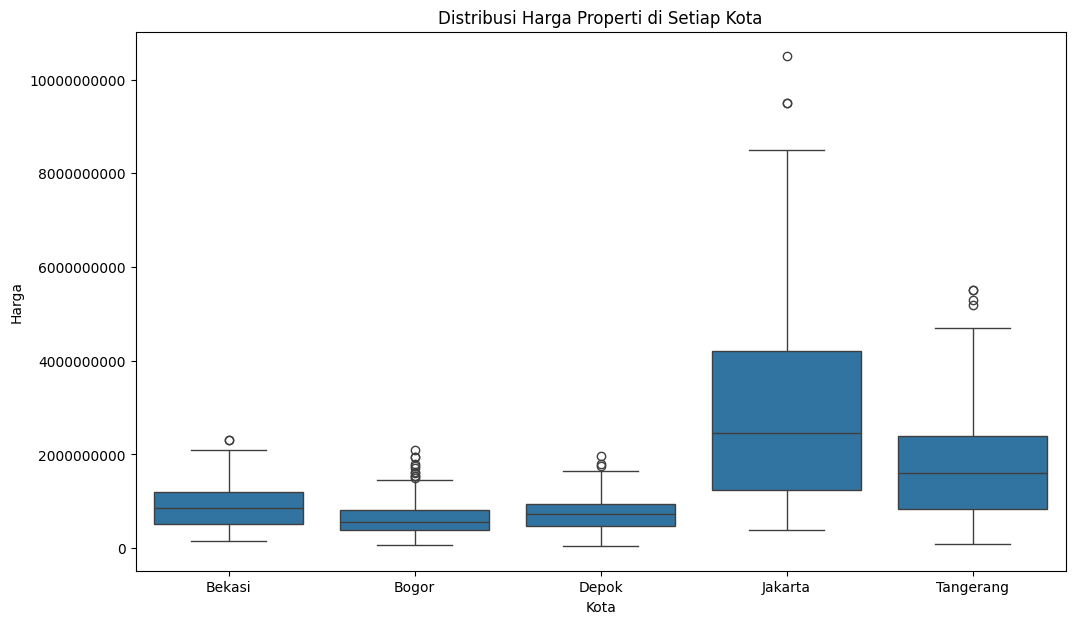

Data outlier

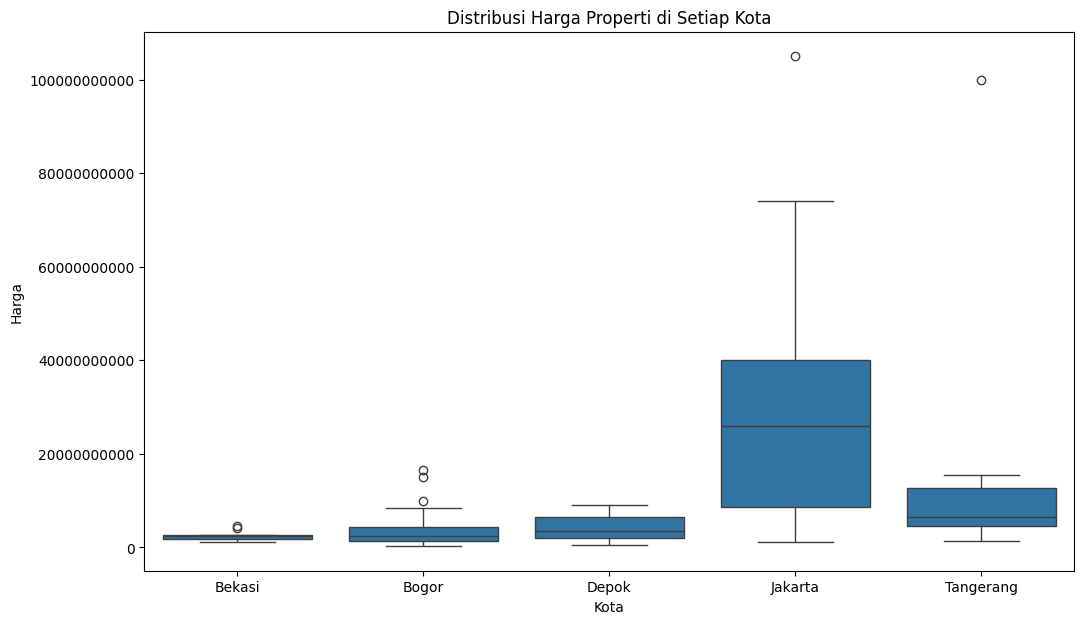

####4. Dari data yang ada, apakah bisa dibuat rekomendasi sebaiknya RPPI membuat kantor cabang berikutnya di kota mana? Mengapa? (Asumsikan RPPI belum memiliki cabang di kota-kota yang disebutkan di data).

#####Jawaban:
Berdasarkan analisis dari data bersih maupun data outlier, kami dapatkan:

- Berdasarkan barplot, baik pada data bersih maupun data outlier, Bogor konsisten muncul sebagai kota dengan jumlah properti yang dijual paling banyak. Hal ini menunjukkan tingginya potensi pasar dan volume transaksi.
- Selanjutnya , boxplot pada data bersih, harga properti di Bogor terlihat stabil dan berada pada kisaran menengah.
- Sementara pada data outlier, harga rata-rata rumah di Bogor relatif lebih murah dibandingkan kota lain. Keduanya menunjukkan pasar Bogor lebih terjangkau untuk segmen menengah.
- Lalu berdasarkan scatterplot, data bersih memperlihatkan bahwa luas tanah dan bangunan di Bogor relatif cukup besar dengan kisaran harga menengah. Data outlier juga menguatkan hal ini, karena properti dengan lahan luas tetap ditawarkan di kisaran harga menengah ke bawah. Hubungan harga dan luas tanah konsisten.

- Terakhir, pada Stacked Bar Chart. Baik data bersih maupun data outlier menunjukkan bahwa mayoritas properti di Bogor memiliki Sertifikat Hak Milik (SHM). Hal ini memberikan kepastian hukum dan menurunkan risiko bagi perusahaan.

Sehingga, dapat disimpulkan bahwa Bogor muncul dengan konsisten sebagai kandidat utama untuk pembukaan cabang baru RPPI.

Data tanpa outlier

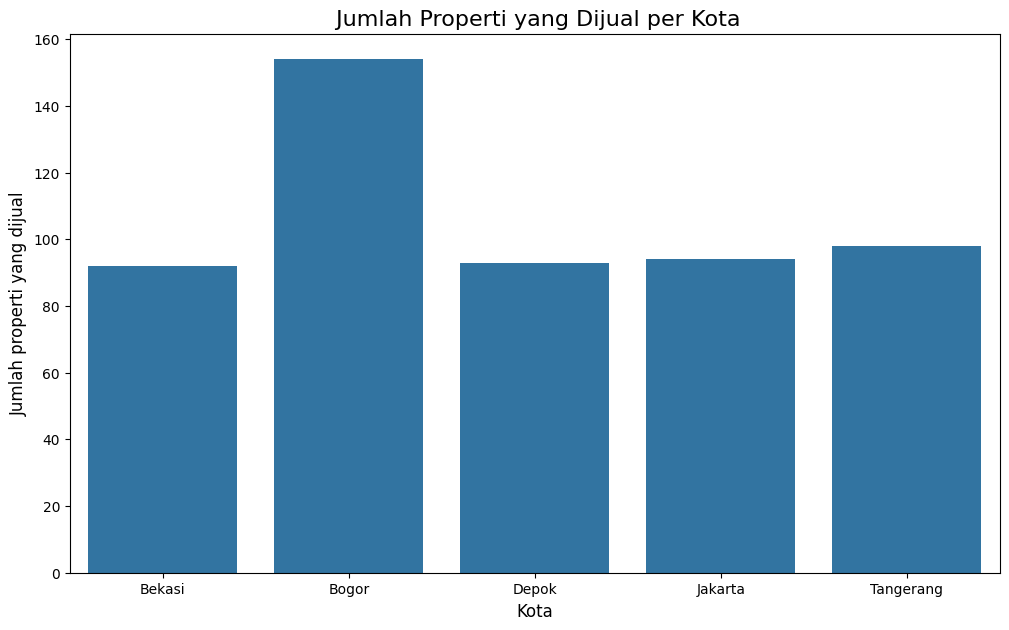

Data outlier

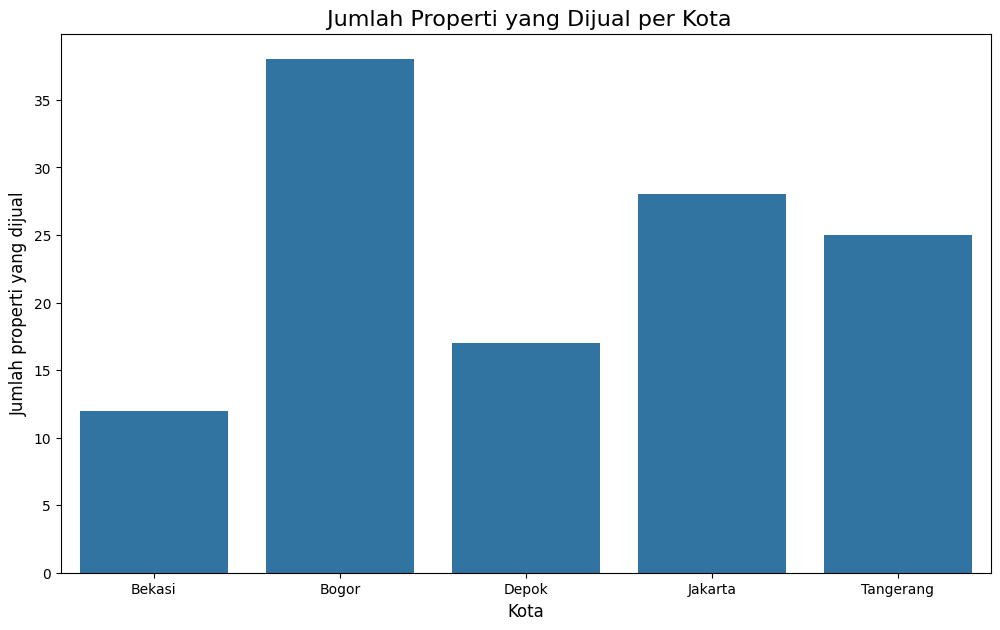

####5. Rumah dengan karakteristik seperti apa yang paling banyak dijual?

#####Jawaban:
Berdasarkan analisis data penjualan properti, terdapat dua kelompok karakteristik rumah yang dominan, tergantung pada jenis data yang dianalisis:

Dari Data Bersih, rumah yang paling banyak dijual memiliki spesifikasi sebagai berikut:

- 2 kamar tidur, 1 kamar mandi

- Tanpa garasi, namun memiliki 1 carport

- Luas tanah: 60–69 m² dan Luas bangunan: 40–59 m²

- Harga berkisar antara Rp 500 juta hingga Rp 1 miliar

Karakteristik ini menunjukkan bahwa segmen rumah sederhana untuk keluarga kecil mendominasi pasar.

Dari Data Outlier, rumah yang paling banyak dijual memiliki spesifikasi sebagai berikut:

- 4 kamar tidur, 3–4 kamar mandi

- Dilengkapi dengan 1 garasi dan 2 carport

- Luas tanah dan bangunan: 200–400 m²

- Harga bervariasi antara Rp 250 juta hingga Rp 10 miliar

Karakteristik ini mencerminkan segmen rumah besar dengan fasilitas lengkap, yang mungkin ditujukan untuk pasar menengah ke atas atau properti khusus.

####6. Jika RPPI ingin melakukan investasi (max) Rp. 25 Milyar minggu besok, apakah dari data anda dapat memberikan rekomendasi rumah mana saja yang akan berpotensi menghasilkan keuntungan bagi perusahaan?

#####Jawaban:

In [35]:
import pandas as pd

# Pastikan kolom kategorik bisa jadi angka
categorical_cols = ['KM','KT','garasi','carport']
numeric_cols = ['LT','LB','listrik','harga']

# Konversi ke numeric
for col in categorical_cols + numeric_cols:
    db_3[col] = pd.to_numeric(db_3[col], errors='coerce')

# Filter hanya rumah dengan sertifikat SHM
df_shm = db_3[db_3['sertifikat'].str.upper() == 'SHM']

# Skor kualitas: rumah dengan nilai kategori tinggi otomatis lebih bagus
df_shm['kapasitas'] = (
    df_shm['KM'] + df_shm['KT'] + df_shm['garasi'] + df_shm['carport']
    + df_shm['LT']*0.01 + df_shm['LB']*0.01+df_shm['listrik']*0.001
)

# Hitung rasio score terhadap harga
df_shm['score_per_harga'] = df_shm['kapasitas'] / df_shm['harga']

# Urutkan berdasarkan score_per_harga (semakin besar semakin menguntungkan)
df_sorted = df_shm.sort_values(by='score_per_harga', ascending=False)

# Seleksi rumah sampai total harga <= 25 M
max_budget = 25_000_000_000
selected_houses = []
total_invest = 0

for idx, row in df_sorted.iterrows():
    if total_invest + row['harga'] <= max_budget:
        selected_houses.append(row)
        total_invest += row['harga']
    else:
        break

# Dataframe hasil seleksi
df_selected = pd.DataFrame(selected_houses)

print("Total investasi:", total_invest)
print("Jumlah rumah terpilih:", len(df_selected))

# Tampilkan hasil akhir
df_selected[['harga','LT','LB','KM','KT','garasi','carport','sertifikat','listrik', 'kapasitas','score_per_harga']]

Total investasi: 24999281361.0
Jumlah rumah terpilih: 68


/tmp/ipython-input-2196483816.py:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipython-input-2196483816.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,harga,LT,LB,KM,KT,garasi,carport,sertifikat,listrik,kapasitas,score_per_harga
1130,65000000.0,119.0,36.0,1.0,2.0,0.0,1.0,SHM,1300.0,6.85,1.053846e-07
1143,65000000.0,84.0,36.0,1.0,2.0,0.0,1.0,SHM,1300.0,6.50,1.000000e-07
1117,70000000.0,60.0,36.0,1.0,2.0,0.0,1.0,SHM,1300.0,6.26,8.942857e-08
4020,148000000.0,72.0,45.0,1.0,2.0,1.0,1.0,SHM,1300.0,7.47,5.047297e-08
47,200000000.0,72.0,72.0,1.0,2.0,1.0,1.0,SHM,1300.0,7.74,3.870000e-08
...,...,...,...,...,...,...,...,...,...,...,...
1109,598000000.0,60.0,63.0,2.0,3.0,0.0,1.0,SHM,2200.0,9.43,1.576923e-08
4014,480000000.0,72.0,54.0,1.0,2.0,1.0,1.0,SHM,1300.0,7.56,1.575000e-08
1148,623000000.0,89.0,69.0,2.0,3.0,0.0,1.0,SHM,2200.0,9.78,1.569823e-08
1058,399000000.0,60.0,36.0,1.0,2.0,0.0,1.0,SHM,1300.0,6.26,1.568922e-08


Direkomendasikan rumah-rumah pada data di atas karena memiliki kapasitas yang baik, yaitu jumlah kamar tidur, kamar mandi, garasi, dan carport yang relatif banyak, serta luas tanah dan luas bangunan yang besar. Selain itu, rumah-rumah ini ditawarkan dengan harga yang relatif murah sehingga berpotensi memberikan keuntungan yang signifikan bagi perusahaan ketika dijual kembali dengan harga lebih tinggi.

####7. Dan yang terpenting, informasi berharga apa lagi yang bisa anda dapatkan dari data?

#####Jawaban:
Saran kami, perusahaan dapat berfokus pada investasi rumah dengan sertifikat SHM, karena rumah dengan SHM mendominasi segmen pasar. Selain itu, daerah Bekasi menunjukkan potensi yang besar, dengan harga properti rata-rata berada pada kategori Sedang (sekitar Rp840 juta). Peluang ini dapat dimanfaatkan untuk mengembangkan proyek perumahan mid-market di Bekasi, dengan strategi volume penjualan unit yang terjangkau.

Spesifikasi ideal di Bekasi adalah menyesuaikan properti dengan harga rata-rata di wilayah tersebut, misalnya dengan LT/LB lebih kecil dan tipe rumah 3 kamar tidur, 2 kamar mandi, agar tetap kompetitif di kategori Sedang.

# **Kesimpulan**

Pada dataset ini tidak dilakukan penanganan missing value dikarenakan data ini di dapatkan dari RPPI sehingga tidak dapat diubah-ubah. Secara keseluruhan, data properti RPPI masih perlu dibersihkan karena terdapat data kosong, duplikat, dan outlier yang dapat memengaruhi akurasi analisis. Diperlukan standarisasi input, validasi rutin, dan sistem deteksi otomatis agar data lebih andal. Berdasarkan analisis, Bogor muncul sebagai kota dengan potensi pasar tertinggi karena jumlah properti yang dijual paling banyak, harga stabil dan terjangkau, serta mayoritas memiliki sertifikat SHM. Oleh karena itu, Bogor direkomendasikan sebagai lokasi pembukaan cabang baru RPPI.